# Случайные блуждания

In [171]:
import pandas as pd
from matplotlib import pyplot as plt

Загрузка данных о времени из csv файла, в который записаны результаты экспериментов (по 10 на каждый набор входных данных) и размещение их в удобном для дальнейшего использования двойном массиве (с усреднением по 10 экспериментам)

In [172]:
dataFrame = pd.read_csv ("results.csv", header = None, delim_whitespace = True )
measures = 10

initialDataList = [[float (dataFrame.iloc[i, 2][0:-1]), dataFrame.iloc[i, 6], 
                    dataFrame.iloc[i, 8]] for i in range (len (dataFrame))]
dataList = []

for i in range (len (initialDataList) // measures) :
    
    averageTime = 0
    for x in initialDataList[i*measures : (i+1)*measures] : averageTime += x[0]
    averageTime /= measures
    
    dataList.append ([initialDataList[i*measures][2], initialDataList[i*measures][1], averageTime])


Функция, получающая из двойного массива результатов именно те, которые нужны для конкретного фиксированного N или P

In [173]:
def getT (P = 0, N = 0) :
    
    if N == 0 and P != 0 :
        
        return [x[2] for x in dataList if x[0] == P]
    
    elif N != 0 and P == 0 :
        
        return [x[2] for x in dataList if x[1] == N]
    
    else :
        
        return None
            

Разбиение результатов экспериментов по удобным массивам для дальнейшего построения графиков

In [174]:
P = [1, 2, 4, 8, 16]
N = [10, 100, 1000, 10000, 100000]

T_N = [getT (P = p) for p in P]                   # T(N) при фиксированных P
S_N = [[T_N[P.index(p)][0] / T_N[P.index(p)][N.index (n)] for n in N] for p in P]
E_N = [[S_N[P.index(p)][N.index (n)] / n for n in N] for p in P]


T_P = [getT (N = n) for n in N]                   # T(P) при фиксированных N
S_P = [[T_P[N.index(n)][0] / T_P[N.index(n)][P.index (p)] for p in P] for n in N]
E_P = [[S_P[N.index(n)][P.index (p)] / p for p in P] for n in N]

Вспомогательная функция для рисования графика 

In [175]:
def drawPlot (number, Xarray, Yarray, indexArray, legend, xlabel, ylabel, xscale, yscale) :
    
    plt.subplot (3, 2, number)

    plt.xscale (xscale)
    plt.yscale (yscale)

    for i in indexArray :
        plt.plot (Xarray, Yarray[indexArray.index (i)], linestyle = 'solid', marker = 'o', 
                  markersize = 10, label = legend + str(i))

    plt.legend()
    plt.xlabel (xlabel, fontsize = 17)
    plt.ylabel (ylabel + '(' + xlabel + ')', fontsize = 17)
    plt.title ("Зависимость " + ylabel + '(' + xlabel + ')', fontsize = 20)

Финальные графики

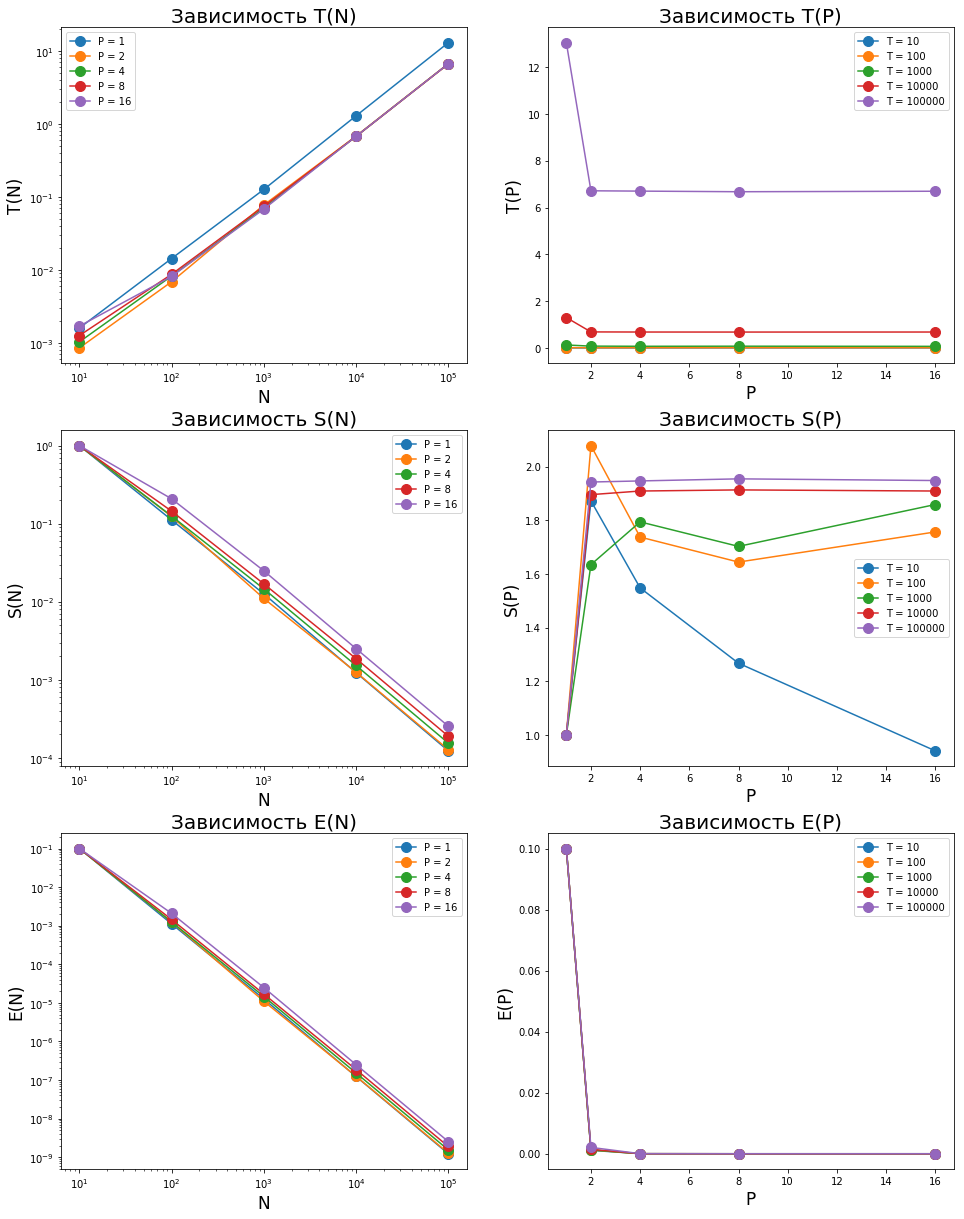

In [176]:
plt.figure (1, figsize = (16, 21))

drawPlot (1, N, T_N, P, "P = ", 'N', 'T', 'log', 'log')
drawPlot (2, P, T_P, N, "T = ", 'P', 'T', 'linear', 'linear')
drawPlot (3, N, S_N, P, "P = ", 'N', 'S', 'log', 'log')
drawPlot (4, P, S_P, N, "T = ", 'P', 'S', 'linear', 'linear')
drawPlot (5, N, E_N, P, "P = ", 'N', 'E', 'log', 'log')
drawPlot (6, P, E_N, N, "T = ", 'P', 'E', 'linear', 'linear')

plt.show()